In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
house = pd.read_csv("Documents/DATA ANAYSIS FOLDER/Hyderbad_House_price.csv")
house

,Unnamed: 0,title,location,price(L),rate_persqft,area_insqft,building_status
0,0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction
...,...,...,...,...,...,...,...
3655,3655,2 BHK Apartment,Ameerpet,60.00,6000,1000,Ready to move
3656,3656,2 BHK Independent House,Jawahar nagar,65.00,3250,2000,Ready to move
3657,3657,2 BHK Independent Floor,Rasoolpura,65.00,6500,1000,Ready to move
3658,3658,2 BHK Independent Floor,Begum Bazar Chatri,55.00,5500,1000,Ready to move


In [3]:
house.shape

(3660, 7)

In [4]:
house.drop(columns ='Unnamed: 0',inplace = True)


In [5]:
house

,title,location,price(L),rate_persqft,area_insqft,building_status
0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction
...,...,...,...,...,...,...
3655,2 BHK Apartment,Ameerpet,60.00,6000,1000,Ready to move
3656,2 BHK Independent House,Jawahar nagar,65.00,3250,2000,Ready to move
3657,2 BHK Independent Floor,Rasoolpura,65.00,6500,1000,Ready to move
3658,2 BHK Independent Floor,Begum Bazar Chatri,55.00,5500,1000,Ready to move


In [6]:
house.rename(columns ={'title':'house type'},inplace =True)

In [7]:
house.rename(columns ={'house type':'housetype'},inplace =True)

In [8]:
house

,housetype,location,price(L),rate_persqft,area_insqft,building_status
0,3 BHK Apartment,Nizampet,108.00,6000,1805,Under Construction
1,3 BHK Apartment,Bachupally,85.80,5500,1560,Under Construction
2,2 BHK Apartment,Dundigal,55.64,5200,1070,Under Construction
3,2 BHK Apartment,Pocharam,60.48,4999,1210,Under Construction
4,3 BHK Apartment,Kollur,113.00,5999,1900,Under Construction
...,...,...,...,...,...,...
3655,2 BHK Apartment,Ameerpet,60.00,6000,1000,Ready to move
3656,2 BHK Independent House,Jawahar nagar,65.00,3250,2000,Ready to move
3657,2 BHK Independent Floor,Rasoolpura,65.00,6500,1000,Ready to move
3658,2 BHK Independent Floor,Begum Bazar Chatri,55.00,5500,1000,Ready to move


In [9]:
house.isnull().sum()

housetype          0
location           0
price(L)           0
rate_persqft       0
area_insqft        0
building_status    0
dtype: int64

In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   housetype        3660 non-null   object 
 1   location         3660 non-null   object 
 2   price(L)         3660 non-null   float64
 3   rate_persqft     3660 non-null   int64  
 4   area_insqft      3660 non-null   int64  
 5   building_status  3660 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 171.7+ KB


In [11]:
house.value_counts('housetype')


housetype
Residential Plot            1617
3 BHK Apartment              798
2 BHK Apartment              667
4 BHK Apartment              114
2 BHK Independent House      101
4 BHK Villa                   94
3 BHK Villa                   82
4 BHK Independent House       44
3 BHK Independent House       25
5 BHK Villa                   22
2 BHK Independent Floor       21
5 BHK Independent House       18
1 BHK Apartment               15
3 BHK Independent Floor        7
5 BHK Apartment                6
2 BHK Villa                    6
7 BHK Independent House        5
6 BHK Villa                    4
1 RK Studio Apartment          3
8 BHK Independent House        3
4 BHK Independent Floor        2
1 BHK Independent House        2
10 BHK Independent House       2
6 BHK Independent House        1
9 BHK Independent House        1
Name: count, dtype: int64

In [12]:
house.value_counts('location')

location
Mirkhanpet                     165
Ameenpur                       164
Meerkhanpet                    140
Kondapur                       107
Shadnagar                      102
                              ... 
Jhangir Pet                      1
Kamkole                          1
Kavadipally                      1
Khajaguda Nanakramguda Road      1
raidurgam                        1
Name: count, Length: 359, dtype: int64

In [13]:
house.value_counts('building_status')

building_status
New                   1378
Under Construction    1161
Ready to move          882
Resale                 239
Name: count, dtype: int64

### Data Visulaziation

In [14]:
columns = house[['housetype','location','building_status']]
columns

,housetype,location,building_status
0,3 BHK Apartment,Nizampet,Under Construction
1,3 BHK Apartment,Bachupally,Under Construction
2,2 BHK Apartment,Dundigal,Under Construction
3,2 BHK Apartment,Pocharam,Under Construction
4,3 BHK Apartment,Kollur,Under Construction
...,...,...,...
3655,2 BHK Apartment,Ameerpet,Ready to move
3656,2 BHK Independent House,Jawahar nagar,Ready to move
3657,2 BHK Independent Floor,Rasoolpura,Ready to move
3658,2 BHK Independent Floor,Begum Bazar Chatri,Ready to move


In [15]:
def graph_all(df):
    for column in df.columns:
        plt.figure(figsize= (200,100))
        sns.countplot(x=column ,hue = column ,data =df)
        plt.title(f"Distribution of {column}")
        plt.show()

In [16]:
graph_all(columns)

In [17]:
columns_1 =  house[['price(L)',	'rate_persqft',	'area_insqft']]	

In [18]:
def graph(df):
    for column in df.columns:
        plt.figure(figsize= (5,6))
        sns.distplot(x= df[column] )
        plt.title(f"Distplot of {column}")
        plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\3303041444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df[column] )


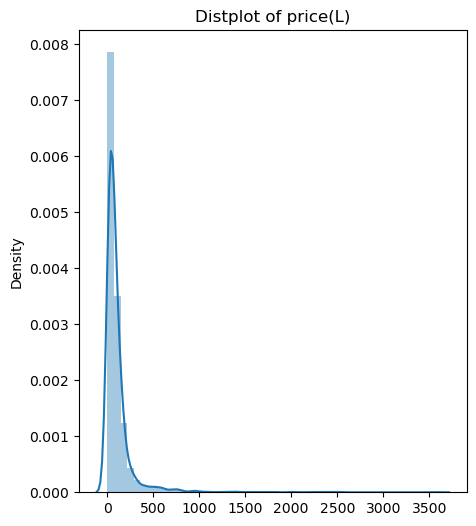

C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\3303041444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df[column] )


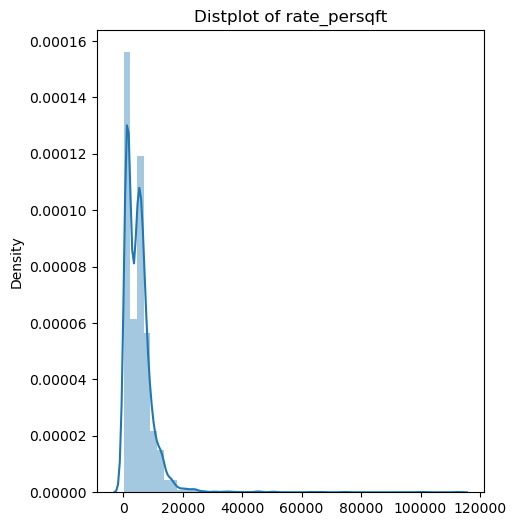

C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\3303041444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= df[column] )


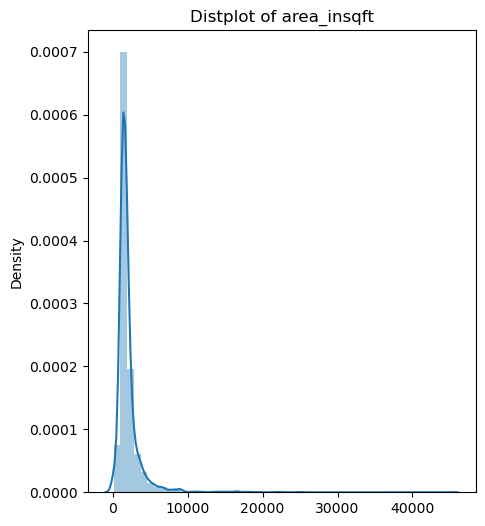

In [19]:
graph(columns_1)

### lABEL Encoding

In [20]:
house_type  = LabelEncoder()
house['housetype'] = house_type.fit_transform(house['housetype'])
location  = LabelEncoder()
house['location'] = location.fit_transform(house['location'])
building_status  = LabelEncoder()
house['building_status'] = building_status.fit_transform(house['building_status'])

In [21]:
house

,housetype,location,price(L),rate_persqft,area_insqft,building_status
0,8,244,108.00,6000,1805,3
1,8,29,85.80,5500,1560,3
2,4,81,55.64,5200,1070,3
3,4,256,60.48,4999,1210,3
4,8,166,113.00,5999,1900,3
...,...,...,...,...,...,...
3655,4,16,60.00,6000,1000,1
3656,6,146,65.00,3250,2000,1
3657,5,280,65.00,6500,1000,1
3658,5,41,55.00,5500,1000,1


In [22]:
house.groupby('price(L)').mean()	

,housetype,location,rate_persqft,area_insqft,building_status
price(L),,,,,
1.32,24.0,298.0,125.0,1056.0,0.0
2.50,24.0,167.0,210.5,1203.0,0.0
2.99,24.0,352.0,277.0,1080.0,0.0
3.00,24.0,345.0,277.0,1080.0,0.0
3.50,24.0,352.0,321.0,1089.0,0.0
...,...,...,...,...,...
2388.00,16.0,164.0,16000.0,14927.0,3.0
2444.00,16.0,164.0,16000.0,15276.0,3.0
2500.00,21.0,37.0,20833.0,12000.0,1.0


In [23]:
correlation = house.corr()
correlation

,housetype,location,price(L),rate_persqft,area_insqft,building_status
housetype,1.000000,0.243731,-0.132264,-0.346703,0.167713,-0.698673
location,0.243731,1.000000,-0.061432,-0.137991,-0.003221,-0.205820
price(L),-0.132264,-0.061432,1.000000,0.628859,0.516428,0.225794
rate_persqft,-0.346703,-0.137991,0.628859,1.000000,0.050840,0.315343
area_insqft,0.167713,-0.003221,0.516428,0.050840,1.000000,0.021213
building_status,-0.698673,-0.205820,0.225794,0.315343,0.021213,1.000000


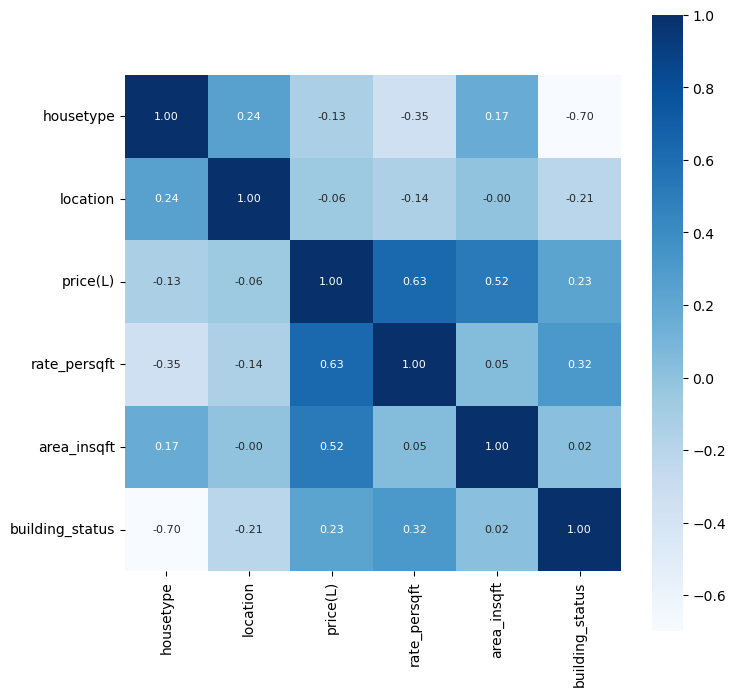

In [24]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation ,cmap ='Blues',fmt ='.2f',cbar =True,annot = True,square=True,annot_kws= {'size':8})
plt.show()

### Splitting of the data

In [25]:
X = house.drop(columns ='price(L)')
Y = house['price(L)']
Y

0       108.00
1        85.80
2        55.64
3        60.48
4       113.00
         ...  
3655     60.00
3656     65.00
3657     65.00
3658     55.00
3659     67.00
Name: price(L), Length: 3660, dtype: float64

In [26]:
print(X)
print(Y)

      housetype  location  rate_persqft  area_insqft  building_status
0             8       244          6000         1805                3
1             8        29          5500         1560                3
2             4        81          5200         1070                3
3             4       256          4999         1210                3
4             8       166          5999         1900                3
...         ...       ...           ...          ...              ...
3655          4        16          6000         1000                1
3656          6       146          3250         2000                1
3657          5       280          6500         1000                1
3658          5        41          5500         1000                1
3659          6       268          4962         1350                1

[3660 rows x 5 columns]
0       108.00
1        85.80
2        55.64
3        60.48
4       113.00
         ...  
3655     60.00
3656     65.00
3657     65.00


### standard scaler

In [27]:
scaler = StandardScaler()
standardized = scaler.fit_transform(X)
X = standardized  
X

array([[-0.79762537,  0.60904381,  0.1570794 , -0.11942961,  1.32305429],
       [-0.79762537, -1.59019799,  0.06301954, -0.25333997,  1.32305429],
       [-1.26335485, -1.05828834,  0.00658362, -0.52116068,  1.32305429],
       ...,
       [-1.14692248,  0.97728895,  0.25113925, -0.55942078, -0.25503882],
       [-1.14692248, -1.46744961,  0.06301954, -0.55942078, -0.25503882],
       [-1.03049011,  0.85454057, -0.03818887, -0.36812027, -0.25503882]])

### Train Test Split

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state =2)

In [29]:
print(X.shape,X_train.shape,X_test.shape)

(3660, 5) (2928, 5) (732, 5)


### Model Fitting

In [30]:
model = XGBRegressor()
model.fit(X_train,Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
train_prediction = model.predict(X_train)
train_mae = mean_absolute_error(Y_train,train_prediction)
train_mae

0.9270886107676666

In [32]:
test_prediction = model.predict(X_test)
test_mae = mean_absolute_error(Y_test,test_prediction)
test_mae

4.5798175058469095

In [33]:
train_prediction = model.predict(X_train)
train_r2_score  = r2_score(Y_train,train_prediction)
train_r2_score

0.9999091401084947

In [34]:
test_prediction = model.predict(X_test)
test_r2_score  = r2_score(Y_test,test_prediction)
test_r2_score

0.9737928497660582

### Model Prediction 

In [48]:
input_data = (['3 BHK Independent House','Dammaiguda',8125,3200,'Ready to move'])
input_data[0] = house_type.transform([input_data[0]])[0]
input_data[1] = location.transform([input_data[1]])[0]
input_data[4] = building_status.transform([input_data[4]])[0]
input_data_as_array = np.asarray(input_data,dtype =np.float32)
input_data_reshape = input_data_as_array.reshape(1,-1)
input_data_scaler = scaler.transform(input_data_reshape)
prediction = model.predict(input_data_scaler)
print(f"Predict of the house :{prediction}")

Predict of the house :[260.23956]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
